In [1]:
import numpy as np
import scipy.optimize as opt
import sdme_logloss as sdme
%pylab inline

Populating the interactive namespace from numpy and matplotlib


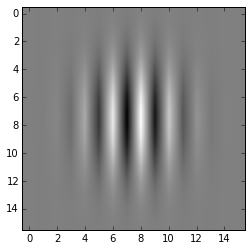

In [2]:
# Import data here.  In this case we will make our own. 
# First we generate some stimulus:
stim_dim = 16*16
stim_len = 20000
stim = np.random.randn(stim_dim, stim_len)
stim = 1.0*stim / np.max(stim)

# Next, we generate (first order) population receptive fields

N = 2  # Number of neurons
p=0.1
fo_rf = np.ones((N, stim_dim))
fo_rf[np.random.rand(N, stim_dim) > p] = 0
fo_rf[0, :] *= 0

# Generate Second Order Receptive fields

x = np.linspace(-1.0, 1.0, 16)
y = x
X, Y = np.meshgrid(x, y)
gb = np.exp(-(X**2 + Y**2)/0.25)*np.sin(2*np.pi*4*X)
plt.figure()
plt.set_cmap('gray')
plt.imshow(gb)

gbvec = np.squeeze(np.reshape(gb, (stim_dim, 1)))
eigvecmat = np.random.randn(stim_dim, stim_dim)
eigvecmat[0, :] = gbvec
eigvalmat = np.identity(stim_dim)/10.0
eigvalmat[0,0] = 1.0
stc_model = np.dot(np.linalg.inv(eigvecmat), np.dot(eigvalmat, eigvecmat))
stc_model_cube = np.zeros((N, stim_dim, stim_dim))
stc_model_cube[0, :, :] = stc_model

# Generate matrix of all possible population states
stmat = sdme.get_states(N)

# Next, we generate correlations between the neurons
p2 = 0.5
neu_corr = np.random.randn(N, N)
neu_corr[np.random.rand(N, N) > p2] = 0
neu_corr = (neu_corr + np.transpose(neu_corr))/2.0 

# Compute the probability over states
outcorr = np.einsum('ijk,jt,kt->it', stc_model_cube, stim, stim)
corr_states = np.diag(np.dot(np.dot(np.transpose(stmat), neu_corr), stmat))

E = np.dot(np.dot(np.transpose(stmat),fo_rf),stim) + np.transpose(np.tile(corr_states, (stim_len, 1))) + np.dot(np.transpose(stmat), outcorr)
probs = np.exp(E) / np.sum(np.exp(E),0 )
probs[np.isnan(probs)] = 1.0

# Generate Responses
# cumulative probs
probs_c = np.concatenate((np.zeros((1, stim_len)), np.cumsum(probs, 0)), 0)

# generate random vec  (COULD BE MADE MORE EFFICIENT)
nreps = 20
pop_response = np.zeros((N, stim_len, nreps))
for rep in range(nreps):
    prb = np.random.rand(1, stim_len)
    outcomes = 1*np.logical_and(probs_c[0:-1, :] < prb, probs_c[1:, :] > prb)
    #np.concatenate((outcomesav, outcomes))
    pop_response_this_rep = np.dot(stmat, outcomes)
    pop_response[:, :, rep] = pop_response_this_rep



In [3]:
# Now we compute our kernels from the data
print(pop_response)
data_sta = sdme.data_to_sta(pop_response, stim)
print('STA')
print(pop_response)
data_stc = sdme.data_to_stc(pop_response, stim)
print('STC')
print(pop_response)
data_cov = sdme.data_to_cov(pop_response)
print('COV')
print(pop_response)
data_empirical = sdme.data_to_empirical2(pop_response)
print('emp')
print(pop_response)

[[[ 0.  1.  1. ...,  0.  1.  1.]
  [ 1.  1.  1. ...,  1.  0.  1.]
  [ 0.  1.  0. ...,  0.  1.  1.]
  ..., 
  [ 0.  0.  1. ...,  1.  0.  0.]
  [ 0.  0.  0. ...,  0.  1.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 1.  1.  0. ...,  0.  1.  1.]
  [ 0.  0.  1. ...,  0.  0.  0.]
  [ 0.  1.  1. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  1.  0.]
  [ 1.  1.  1. ...,  1.  0.  0.]
  [ 1.  1.  1. ...,  1.  1.  1.]]]
STA
[[[ 0.  1.  1. ...,  0.  1.  1.]
  [ 1.  1.  1. ...,  1.  0.  1.]
  [ 0.  1.  0. ...,  0.  1.  1.]
  ..., 
  [ 0.  0.  1. ...,  1.  0.  0.]
  [ 0.  0.  0. ...,  0.  1.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 1.  1.  0. ...,  0.  1.  1.]
  [ 0.  0.  1. ...,  0.  0.  0.]
  [ 0.  1.  1. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  1.  0.]
  [ 1.  1.  1. ...,  1.  0.  0.]
  [ 1.  1.  1. ...,  1.  1.  1.]]]
STC
[[[ 0.  1.  1. ...,  0.  1.  1.]
  [ 1.  1.  1. ...,  1.  0.  1.]
  [ 0.  1.  0. ...,  0.  1.  1.]
  ..., 
  [ 0.  0.  1. ...,  1.  0.  0.]
  [ 0.  0.  0. ..., 

In [8]:
-

In [9]:
print(logloss(pstart))
print(logloss3(pstart))
print(dlogloss(pstart))
print(dlogloss3(pstart))

551659250.87
1.37914812718
[ -5.53337149e-10  -2.06863885e-08  -4.33881302e-07 ...,  -1.45515847e-08
  -2.08070581e-06   5.62359887e-06]
[  2.47559630e-04  -5.23797332e-05   6.09313456e-04 ...,   2.46849442e-05
   2.05224895e-03  -7.26348712e-03]


In [ ]:
# conjugate-gradient:
pfinal = opt.fmin_l_bfgs_b(logloss3,pstart,fprime=dlogloss3, iprint=0)

In [7]:
pfinal

(array([ -6.60731961e-05,  -4.64062503e-05,  -1.92943486e-03, ...,
         -4.88679357e-05,   1.97966365e-02,   5.64961712e-03]),
 1.3791481271753738,
 {'funcalls': 21,
  'grad': array([ -1.67562994e-04,  -9.92510258e-05,  -4.26907897e-04, ...,
           1.35845750e-05,  -2.07696763e-03,   6.40519312e-03]),
  'nit': 0,
  'task': 'ABNORMAL_TERMINATION_IN_LNSRCH',
  'warnflag': 2})

In [13]:
test_d = dlogloss(pfinal)

KeyboardInterrupt: 

In [22]:
np.shape(pstart)

(131585,)